In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

import sys
sys.path.append("..")
sys.path.append("../shared")

import bartolozziSPEED

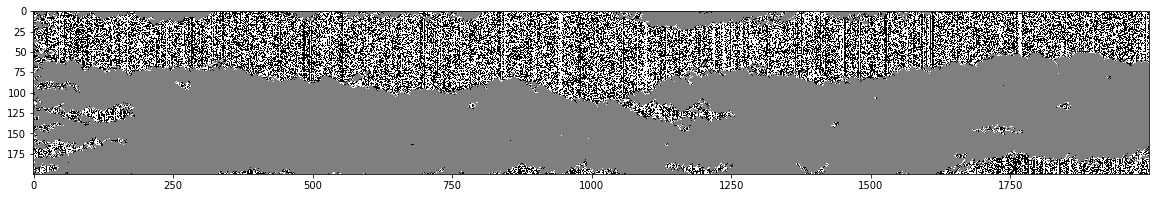

In [11]:
np.random.seed(1)
random.seed(1)

G, x = bartolozziSPEED.generate(.47,.0001,.5,.5,2000,200,2,1,.001)

plt.figure(figsize=(20,3))
plt.imshow(G.T, cmap="binary", aspect="auto", interpolation="None")

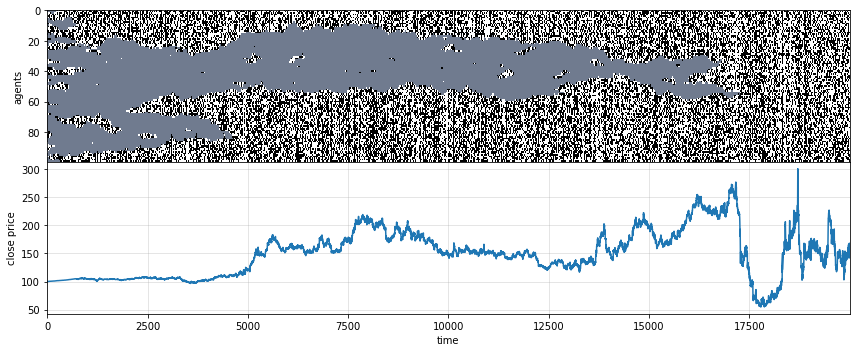

In [43]:
N0 = 20000
N1 = 100

pd = 0.01
pe = 0.0001
ph = 0.0099

pa = 0.4

A = 2
a = 2*A
h = 0.001

G, x = bartolozziSPEED.generate(pd, pe, ph, pa, N0, N1, A, a, h)

fig, (ax1, ax2) = plt.subplots(
    ncols=1, nrows=2, figsize=(12,5), sharex=True, gridspec_kw = {'wspace':0, 'hspace':0}
)
ax1.imshow(G.T, cmap="bone", interpolation="None", aspect="auto")
# plt.colorbar()

r = (x - np.mean(x)) / np.std(x)

s = 100
S = np.zeros_like(x)
S[0] = s
for i in range(1,N0):
    # S[i] = S[i-1] + (S[i-1] * r[i])
    S[i] = S[i-1] + (S[i-1] * r[i]/100) + 0.01

ax2.plot(S)
ax2.grid(alpha=0.4)

ax2.set_xlabel("time")
ax2.set_ylabel("close price")
ax1.set_ylabel("agents")

plt.tight_layout()
plt.show()